<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Foreword" data-toc-modified-id="Foreword-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Foreword</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Process" data-toc-modified-id="Process-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Process</a></span></li></ul></li><li><span><a href="#Installations-and-imports" data-toc-modified-id="Installations-and-imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installations and imports</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Bag-of-words" data-toc-modified-id="Bag-of-words-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bag of words</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Word2Vec</a></span></li></ul></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#No-word-embedding" data-toc-modified-id="No-word-embedding-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>No word embedding</a></span><ul class="toc-item"><li><span><a href="#Comparison" data-toc-modified-id="Comparison-4.4.2.1"><span class="toc-item-num">4.4.2.1&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Glove" data-toc-modified-id="Glove-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Glove</a></span><ul class="toc-item"><li><span><a href="#Comparison" data-toc-modified-id="Comparison-4.4.3.1"><span class="toc-item-num">4.4.3.1&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li></ul></li><li><span><a href="#Word2vec" data-toc-modified-id="Word2vec-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Word2vec</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Comparison" data-toc-modified-id="Comparison-4.5.0.1"><span class="toc-item-num">4.5.0.1&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Hypertuning" data-toc-modified-id="Hypertuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypertuning</a></span><ul class="toc-item"><li><span><a href="#Re-training" data-toc-modified-id="Re-training-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Re training</a></span></li></ul></li><li><span><a href="#Training-with-more-data" data-toc-modified-id="Training-with-more-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training with more data</a></span></li><li><span><a href="#Test-model" data-toc-modified-id="Test-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test model</a></span></li><li><span><a href="#Deploy-to-Azure-cloud" data-toc-modified-id="Deploy-to-Azure-cloud-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Deploy to Azure cloud</a></span></li></ul></div>

# Foreword

This notebook will be used to train and test a custom RNN model, after coparing several sklearn / RNN models.

## Goal

In this notebook, I'll fetch 1600 tweets from the dataset, pre-process the text and compare 3 sklearn classification models and 3 RNN models, with and without word embeddings.

## Process

- Fetch and sample the dataset
- Pre-process text
- Compare Sklearn models on Bag of words / TF-IDF / Word2vec vectors
- Compare RNN models without embeddings then with Glove and Word2Vec
- Tune the selected model
- Train the model on a bigger dataset (500k tweets)
- Deploy the model on Azure ACI (Azure Container Instance)


# Installations and imports

In [3]:
!pip install texthero -U
!pip install azureml-sdk
!pip install azureml
!pip install azureml-core
!pip install azureml-contrib-services


     |█▍                              | 10 kB 26.1 MB/s eta 0:00:01
     |██▊                             | 20 kB 32.8 MB/s eta 0:00:01
     |████                            | 30 kB 37.9 MB/s eta 0:00:01
     |█████▍                          | 40 kB 30.6 MB/s eta 0:00:01
     |██████▉                         | 51 kB 34.3 MB/s eta 0:00:01
     |████████▏                       | 61 kB 15.2 MB/s eta 0:00:01
     |█████████▌                      | 71 kB 16.5 MB/s eta 0:00:01
     |██████████▉                     | 81 kB 18.0 MB/s eta 0:00:01
     |████████████▏                   | 92 kB 17.3 MB/s eta 0:00:01
     |█████████████▋                  | 102 kB 18.7 MB/s eta 0:00:01
     |███████████████                 | 112 kB 18.7 MB/s eta 0:00:01
     |████████████████▎               | 122 kB 18.7 MB/s eta 0:00:01
     |█████████████████▋              | 133 kB 18.7 MB/s eta 0:00:01
     |███████████████████             | 143 kB 18.7 MB/s eta 0:00:01
     |████████████████████▍           | 15

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import configparser

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, precision_recall_curve, auc, make_scorer, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import joblib

from textblob import TextBlob, Word
import azureml.core
from azureml.core import Workspace
from azureml.core import Model
from azureml.core.resource_configuration import ResourceConfiguration
from azureml.core.webservice import AciWebservice, AksWebservice, Webservice
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies
import gensim
import spacy
from gensim.models import Word2Vec
import texthero as hero
from texthero import preprocessing
import re
import time

import gc, os, requests
from IPython.display import Markdown, display
from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!python -m spacy download fr
nlp = spacy.load("fr")

In [5]:
%%capture
tqdm().pandas()
MAX_LEN = 100

In [ ]:
from azure.storage.blob import BlobServiceClient

STORAGEACCOUNTURL= 'https://ocrp7studiostorage.blob.core.windows.net/'
STORAGEACCOUNTKEY= '""""""""""'
LOCALFILENAME= 'full.csv'
CONTAINERNAME= 'ocr-container'
BLOBNAME= 'full_training.1600000.processed.noemoticon.csv'
blob_service_client_instance = BlobServiceClient(account_url=STORAGEACCOUNTURL, credential=STORAGEACCOUNTKEY)
blob_client_instance = blob_service_client_instance.get_blob_client(CONTAINERNAME, BLOBNAME, snapshot=None)
with open(LOCALFILENAME, "wb") as my_blob:
    blob_data = blob_client_instance.download_blob()
    blob_data.readinto(my_blob)


In [9]:
df = pd.read_csv('/content/drive/MyDrive/full_training.1600000.processed.noemoticon.csv')
back = df.copy()

In [71]:
back.head(5)

sentiment                                              tweet
0          0  @JosieHobo I WOULD SOOOOO BE THERE IF I DIDN'T...
1          0  OMG, I just moisturised and my legs are BURNIN...
2          0  @APGB yeah.  just good.  Deadpool was WAAAAAY ...
3          0                       I feel bad for Danny Gokey. 
4          0  How much blood do they need from...they took e...

In [11]:
train = back.sample(1600, random_state=42)

# Cleaning

## Functions

In [12]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

def custom_clean(str):
    str = re.sub("@[A-Za-z0-9_]+","", str)
    str = re.sub(r'#', '', str) #hastags
    str = re.sub(r'RT[\s]+', '', str) #RT
    # str = re.sub(r'\b\w{,2}\b', '', str) #remove words less than 3 letters
    return str
custom_stopwords = [ "a", "about", "above", "after", "again", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

custom_pipeline = [
    #preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_urls,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_brackets,
    preprocessing.remove_digits,
    preprocessing.remove_html_tags,
    preprocessing.remove_whitespace,
    ]

train['clean_tweet'] = train['tweet'].apply(lambda x: custom_clean(x))
train['clean_tweet'] =  hero.clean(train['clean_tweet'], custom_pipeline)

train['sentiment'].replace(4, 1, inplace=True)
train['sentiment'].value_counts()

1    901
0    699
Name: sentiment, dtype: int64

# Classification

## Functions

In [14]:
def add_to_comparison_table(df, results):
    label = results['name']
    keys_to_remove = ["model", "name", "score"]
    for key in keys_to_remove:
        del results[key]
        
    res = pd.DataFrame(results.values(), index= results.keys(), columns=[label])
    return pd.concat([df, res], axis=1)

def model_evaluation(models, X_train, y_train, X_test, y_test, comparison_df, name='', score='accuracy', curve=False, roc=False):
    best_score = {"name" : "", "model": "", "score": -1}
    training_time = 0
    
    for name, model in models.items():
        printmd(name)
        start =  time.time()
        model.fit(X_train, y_train)
        training_time = time.time() -start
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        results_dict = {
                        'precision': precision_score(y_test, y_pred),
                        'accuracy': accuracy_score(y_test, y_pred),
                        'roc_auc': roc_auc_score(y_test, y_pred),
                        'train time' :  training_time
                       }

        if results_dict[score] > best_score['score']:
            best_score['name'] = name
            best_score['model'] = model
            best_score['train time'] = training_time
            best_score['Accuracy'] = results_dict['accuracy']
            best_score['Precision'] = results_dict['accuracy']
            best_score['AUC'] = results_dict['roc_auc']
            best_score['score'] = results_dict[score]
            
    comparison_df = add_to_comparison_table(comparison_df, best_score.copy())
    if curve == True:
        N, train_score, val_score = learning_curve(best_score['model'], X_train, y_train, 
                                                   cv = 3, train_sizes=np.linspace(0.1, 1, 10),
                                                  scoring = 'roc_auc',
                                                    verbose=0,
                                                  n_jobs=6)


        ax = plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1), label = best_score['name'] + " " + score + " : train score")
        plt.plot(N, val_score.mean(axis=1), label = best_score['name'] + " " + score + " : validation score")
        plt.xlabel('Amount of datas')
        plt.ylabel('Score')
        plt.title("Learning curve {}, model {}".format(score, best_score['name']))
        plt.legend()
    return comparison_df, best_score

def models(title):
        
    LR = LogisticRegression(random_state=0, n_jobs=10)
    
    RandomForest = RandomForestClassifier(random_state=0, n_jobs=10)
    
    Adaboost = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
    

    model_dict = {
    "LR {}".format(title) : LR,
    "Adaboost {}".format(title) : Adaboost,
    "RandomForest {}".format(title) : RandomForest
    }
    return model_dict

def printmd(string, color=None):
    colorstr = "<b>{}</b>".format(string)
    display(Markdown(colorstr))
    
def fit_and_sum_up(title, func, score):
    comparison, best = func
    printmd("Model comparison: ", title)
    print("Best " + score + " model " + "\033[1m" + best['name'] + "\033[0m" + " with score " + "\033[1m" + str(best['AUC']))
    return comparison

def get_train_test_sets(df, tokenizer):
    df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df.sentiment)

    X_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_tweet), maxlen=max_len)
    X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_tweet), maxlen=max_len)

    y_train = np.asarray(df_train.sentiment).reshape(-1,1)
    y_test = np.asarray(df_test.sentiment).reshape(-1,1)
    return X_train, X_test, y_train, y_test

def read_glove_vector(glove_vec):
    with open(glove_vec, 'r', encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            w_line = line.split()
            curr_word = w_line[0]
            word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)

  return word_to_vec_map

def get_embedding_vector(tokenizer):
    
  word_to_vec_map = read_glove_vector('/content/drive/MyDrive/OCR7/glove.6B.100d.txt')

  vocab_len = len(tokenizer.word_index) + 1
  embed_vector_len = word_to_vec_map['hello'].shape[0]

  emb_matrix = np.zeros((vocab_len, embed_vector_len))
  for word, i in tokenizer.word_index.items():
    embedding_vector = word_to_vec_map.get(word)
    if embedding_vector is not None:
      emb_matrix[i] = embedding_vector
  print(emb_matrix.shape)
  return emb_matrix, embed_vector_len, vocab_len

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += w2v_model[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

## Bag of words

In [39]:
X = train.clean_tweet
y = train.sentiment


countVect = CountVectorizer(max_features=100, min_df=2, ngram_range=(1,2))
count_data = countVect.fit_transform(X)

bow_df = pd.DataFrame(count_data.toarray())
bow_df.shape


(1600, 100)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(bow_df, 
                                                    y, 
                                                    stratify=y,
                                                    test_size=0.3, 
                                                    random_state=42)
dummy_clf = DummyClassifier(random_state=42)

comparison, best = model_evaluation({'dummy': dummy_clf}, X_train, y_train, X_test, y_test, pd.DataFrame(), score='precision', curve=False)
comparison.head()

<b>dummy</b>

[[ 98 112]
 [113 157]]
              precision    recall  f1-score   support

           0       0.46      0.47      0.47       210
           1       0.58      0.58      0.58       270

    accuracy                           0.53       480
   macro avg       0.52      0.52      0.52       480
weighted avg       0.53      0.53      0.53       480



dummy
train time  0.000809
Accuracy    0.531250
Precision   0.531250
AUC         0.524074

<b>LR Bag of words</b>

[[ 97 113]
 [ 59 211]]
              precision    recall  f1-score   support

           0       0.62      0.46      0.53       210
           1       0.65      0.78      0.71       270

    accuracy                           0.64       480
   macro avg       0.64      0.62      0.62       480
weighted avg       0.64      0.64      0.63       480



<b>Adaboost Bag of words</b>

[[ 77 133]
 [ 54 216]]
              precision    recall  f1-score   support

           0       0.59      0.37      0.45       210
           1       0.62      0.80      0.70       270

    accuracy                           0.61       480
   macro avg       0.60      0.58      0.57       480
weighted avg       0.61      0.61      0.59       480



<b>RandomForest Bag of words</b>

[[105 105]
 [ 81 189]]
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       210
           1       0.64      0.70      0.67       270

    accuracy                           0.61       480
   macro avg       0.60      0.60      0.60       480
weighted avg       0.61      0.61      0.61       480



<b>Model comparison: </b>

Best precision model LR Bag of words with score 0.6216931216931217


dummy  LR Bag of words
train time  0.000809         2.935791
Accuracy    0.531250         0.641667
Precision   0.531250         0.641667
AUC         0.524074         0.621693

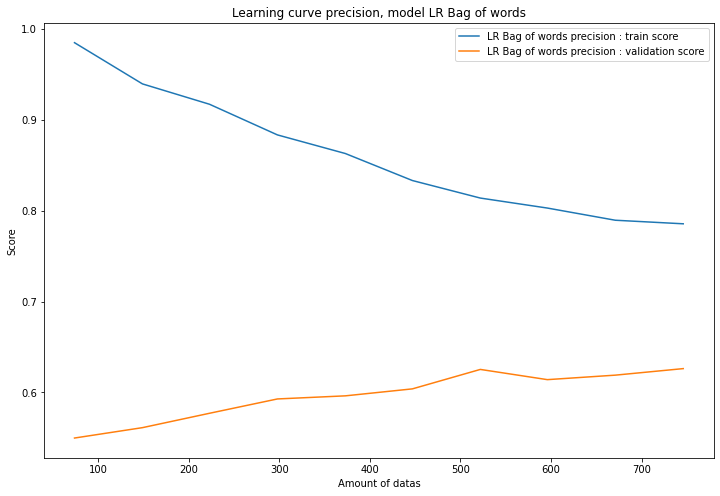

In [41]:
title = "Bag of words"
model_list = models(title)
comparison = fit_and_sum_up (title, model_evaluation(model_list, X_train, y_train, X_test, y_test, comparison, score='precision', curve=True), "precision")
comparison.head()

## TF-IDF

In [42]:
y = train.sentiment
X = train.clean_tweet

vectorizer = TfidfVectorizer(max_features = 100, min_df=2)

tfidf = vectorizer.fit_transform(X)
tokens = vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tokens)
display(tfidf_df.shape)

(1600, 100)

<b>LR TF_IDF</b>

[[ 99 111]
 [ 63 207]]
              precision    recall  f1-score   support

           0       0.61      0.47      0.53       210
           1       0.65      0.77      0.70       270

    accuracy                           0.64       480
   macro avg       0.63      0.62      0.62       480
weighted avg       0.63      0.64      0.63       480



<b>Adaboost TF_IDF</b>

[[ 69 141]
 [ 44 226]]
              precision    recall  f1-score   support

           0       0.61      0.33      0.43       210
           1       0.62      0.84      0.71       270

    accuracy                           0.61       480
   macro avg       0.61      0.58      0.57       480
weighted avg       0.61      0.61      0.59       480



<b>RandomForest TF_IDF</b>

[[111  99]
 [ 82 188]]
              precision    recall  f1-score   support

           0       0.58      0.53      0.55       210
           1       0.66      0.70      0.68       270

    accuracy                           0.62       480
   macro avg       0.62      0.61      0.61       480
weighted avg       0.62      0.62      0.62       480



<b>Model comparison: </b>

Best precision model RandomForest TF_IDF with score 0.6124338624338623


dummy  LR Bag of words  RandomForest TF_IDF
train time  0.000809         2.935791             0.450625
Accuracy    0.531250         0.641667             0.622917
Precision   0.531250         0.641667             0.622917
AUC         0.524074         0.621693             0.612434

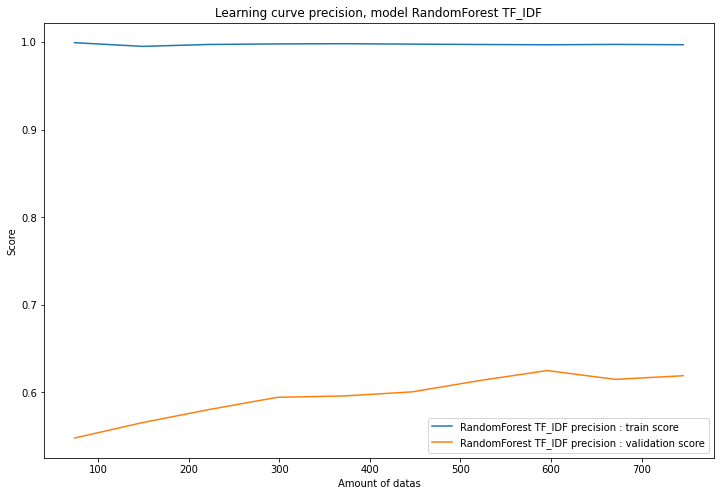

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, 
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3, 
                                                    random_state=42)
dummy_clf = DummyClassifier(random_state=42)

title = "TF_IDF"
model_list = models(title)
comparison = fit_and_sum_up (title, model_evaluation(model_list, X_train, y_train, X_test, y_test, comparison, score = 'precision', curve=True), 'precision')
comparison.head()

### Word2Vec

In [44]:
size = 100
min_count = 2
workers = 3
seed = 42
sg = 1

X = train.reset_index(drop=True)
y = train.sentiment
tokens = X['clean_tweet'].apply(lambda x: x.split()) # tokenizing 
# train_tokens
w2v_model = Word2Vec(tokens, min_count = min_count, size = size, workers = workers, sg = sg)


w2v_model.train(tokens, total_examples= len(X['clean_tweet']), epochs=20)


word2vec_arrays = np.zeros((len(tokens), 100)) 
for i in range(len(tokens)):
    word2vec_arrays[i,:] = word_vector(tokens[i], 100)
w2vec_df = pd.DataFrame(word2vec_arrays)

#w2cev_df['sentiment'] = train['sentiment']
w2vec_df.head()

0         1         2   ...        97        98        99
0  0.058829  0.077744  0.153316  ... -0.149327 -0.000366 -0.045412
1  0.135251  0.009722  0.156851  ... -0.194316  0.040886 -0.052309
2  0.029284  0.094681  0.185488  ... -0.235130  0.034820 -0.033101
3  0.112502  0.081497  0.148813  ... -0.078675  0.022473 -0.025707
4  0.069977  0.132237  0.105774  ... -0.130737  0.042013 -0.029058

[5 rows x 100 columns]

<b>LR Word2vec</b>

[[ 90 120]
 [ 60 210]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50       210
           1       0.64      0.78      0.70       270

    accuracy                           0.62       480
   macro avg       0.62      0.60      0.60       480
weighted avg       0.62      0.62      0.61       480



<b>Adaboost Word2vec</b>

[[ 94 116]
 [ 79 191]]
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       210
           1       0.62      0.71      0.66       270

    accuracy                           0.59       480
   macro avg       0.58      0.58      0.58       480
weighted avg       0.59      0.59      0.59       480



<b>RandomForest Word2vec</b>

[[ 96 114]
 [ 72 198]]
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       210
           1       0.63      0.73      0.68       270

    accuracy                           0.61       480
   macro avg       0.60      0.60      0.59       480
weighted avg       0.61      0.61      0.60       480



<b>Model comparison: </b>

Best precision model LR Word2vec with score 0.6031746031746033


dummy  LR Bag of words  RandomForest TF_IDF  LR Word2vec
train time  0.000809         2.935791             0.450625     0.514058
Accuracy    0.531250         0.641667             0.622917     0.625000
Precision   0.531250         0.641667             0.622917     0.625000
AUC         0.524074         0.621693             0.612434     0.603175

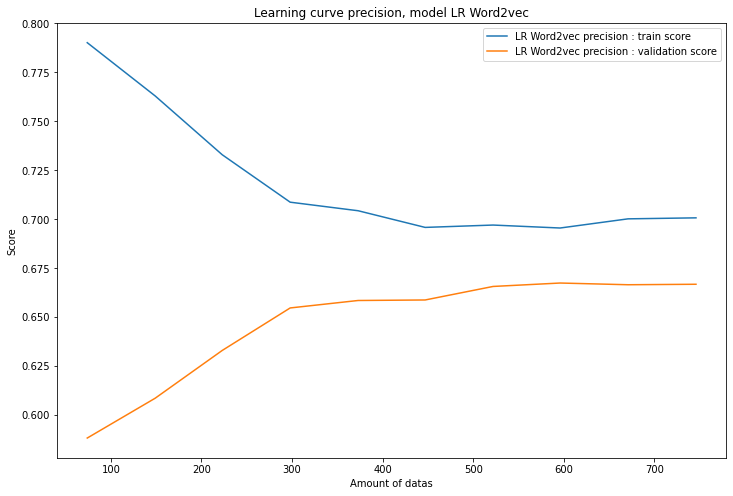

In [45]:
X_train, X_test, y_train, y_test = train_test_split(w2vec_df, 
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3, 
                                                    random_state=42)

title = "Word2vec"
model_list = models(title)
comparaison = fit_and_sum_up (title, model_evaluation(model_list, X_train, y_train, X_test, y_test, comparison, score='precision', curve=True), 'precision')
comparaison.head()

## Neural Networks
### Functions

In [46]:
def evaluate_model(models, comparison_df, X_train, y_train, X_test, y_test): 
    for name, model in models.items():
        start = time.time()
    
        model.compile(optimizer="adam", loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.Precision(name='precision'), 'accuracy'])
        # fit network
        batch_size = 16
        epochs = 15
        history = model.fit(
            X_train,
            y_train,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_precision',
                    patience=4,
                    restore_best_weights=True,
                    verbose=1
                ),
            ]
        )
        end = time.time()
        training_time = end - start
        
        y_pred = model.predict(X_test)
        y_pred = [int(item>0.5) for  item in y_pred]
        # print(y_pred, y_test)
        
        cf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion matrix for {}".format(name))
        # print(cf_matrix)
        plt.figure()
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
        plt.show()
        # ev = model.evaluate(X_test, y_test)
        results_dict = {'model': model,
                        'name': name,
                        'train time': training_time,
                        'Accuracy': np.max(history.history['val_accuracy']),
                        'Precision': np.max(history.history['val_precision']),
                        'AUC': np.max(history.history['val_AUC']),
                        'score' : np.max(history.history['AUC'])
                        }
        comparison_df = add_to_comparison_table(comparison_df, results_dict)
    return comparison_df


def get_models(embedding, name):
    simplernn_model = Sequential([
        embedding,
        SimpleRNN(32),
        Dropout(0.5),
        BatchNormalization(),
        Flatten(),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    gru_model = Sequential([
        embedding,
        Bidirectional(GRU(32)),
        Dropout(0.5),
        BatchNormalization(),
        Flatten(),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    lstm_model = Sequential([
        embedding,
        Bidirectional(LSTM(32)),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_list = {
        "SimpleRNN {}".format(name): simplernn_model,
        "GRU {}".format(name): gru_model,
        "LSTM {}".format(name): lstm_model
    }
    return model_list


### No word embedding

In [47]:
X = train.clean_tweet.values
y = train.sentiment

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(tokenizer.word_index)

Found 4386 unique tokens.
{'i': 1, 'the': 2, 'to': 3, 'a': 4, 'you': 5, 'my': 6, 'and': 7, 'it': 8, 'is': 9, 'for': 10, 'in': 11, 'of': 12, 'that': 13, 's': 14, 'me': 15, 'on': 16, 't': 17, 'm': 18, 'have': 19, 'so': 20, 'but': 21, 'be': 22, 'with': 23, 'at': 24, 'just': 25, 'not': 26, 'good': 27, 'this': 28, 'out': 29, 'up': 30, 'now': 31, 'day': 32, 'are': 33, 'quot': 34, 'all': 35, 'can': 36, 'was': 37, 'no': 38, 'get': 39, 'like': 40, 'your': 41, 'too': 42, 'from': 43, 'do': 44, 'go': 45, 'we': 46, 'lol': 47, 'today': 48, 'work': 49, 'got': 50, 'going': 51, 'know': 52, 'about': 53, 'u': 54, 'one': 55, 'back': 56, 'had': 57, 'what': 58, 'really': 59, 'love': 60, 'amp': 61, 'time': 62, 'how': 63, 'will': 64, 'im': 65, 'if': 66, 'its': 67, 'there': 68, 'or': 69, 'want': 70, 'thanks': 71, 'don': 72, 'off': 73, 'see': 74, 'new': 75, 'll': 76, 'need': 77, 'oh': 78, 'think': 79, 'an': 80, 'here': 81, 'home': 82, 'they': 83, 'well': 84, 'am': 85, 'he': 86, 'some': 87, 'right': 88, 'then': 

In [48]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(tokenizer.word_index)


Found 4386 unique tokens.
{'i': 1, 'the': 2, 'to': 3, 'a': 4, 'you': 5, 'my': 6, 'and': 7, 'it': 8, 'is': 9, 'for': 10, 'in': 11, 'of': 12, 'that': 13, 's': 14, 'me': 15, 'on': 16, 't': 17, 'm': 18, 'have': 19, 'so': 20, 'but': 21, 'be': 22, 'with': 23, 'at': 24, 'just': 25, 'not': 26, 'good': 27, 'this': 28, 'out': 29, 'up': 30, 'now': 31, 'day': 32, 'are': 33, 'quot': 34, 'all': 35, 'can': 36, 'was': 37, 'no': 38, 'get': 39, 'like': 40, 'your': 41, 'too': 42, 'from': 43, 'do': 44, 'go': 45, 'we': 46, 'lol': 47, 'today': 48, 'work': 49, 'got': 50, 'going': 51, 'know': 52, 'about': 53, 'u': 54, 'one': 55, 'back': 56, 'had': 57, 'what': 58, 'really': 59, 'love': 60, 'amp': 61, 'time': 62, 'how': 63, 'will': 64, 'im': 65, 'if': 66, 'its': 67, 'there': 68, 'or': 69, 'want': 70, 'thanks': 71, 'don': 72, 'off': 73, 'see': 74, 'new': 75, 'll': 76, 'need': 77, 'oh': 78, 'think': 79, 'an': 80, 'here': 81, 'home': 82, 'they': 83, 'well': 84, 'am': 85, 'he': 86, 'some': 87, 'right': 88, 'then': 

In [49]:
# max length of review
max_len = 0
for seq in range(len(sequences)):
    amount_of_words = len(sequences[seq])
    if (amount_of_words) > (max_len):
        max_len = amount_of_words
print(max_len)

32


In [50]:
# Padding the sequence for shorter reviews 

data = pad_sequences(sequences, maxlen = MAX_LEN)
y = np.asarray(y)
print(data)
print('data tensor:', data.shape)
print('label tensor:', y.shape)

[[   0    0    0 ...   23 1540  109]
 [   0    0    0 ...   20  573  263]
 [   0    0    0 ...   29   11 1543]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...  176   73  177]
 [   0    0    0 ...   20  417   71]]
data tensor: (1600, 100)
label tensor: (1600,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3, 
                                                    random_state=42)

#### Comparison

Epoch 1/15
56/56 [==============================] - 6s 31ms/step - loss: 0.7807 - AUC: 0.4734 - precision: 0.5147 - accuracy: 0.4509 - val_loss: 0.6872 - val_AUC: 0.5380 - val_precision: 0.5615 - val_accuracy: 0.5312
Epoch 2/15
56/56 [==============================] - 1s 21ms/step - loss: 0.7229 - AUC: 0.5285 - precision: 0.5636 - accuracy: 0.5089 - val_loss: 0.6835 - val_AUC: 0.5370 - val_precision: 0.5755 - val_accuracy: 0.5714
Epoch 3/15
56/56 [==============================] - 1s 21ms/step - loss: 0.7162 - AUC: 0.5275 - precision: 0.5760 - accuracy: 0.5346 - val_loss: 0.6808 - val_AUC: 0.5439 - val_precision: 0.5760 - val_accuracy: 0.5759
Epoch 4/15
56/56 [==============================] - 1s 21ms/step - loss: 0.6814 - AUC: 0.5768 - precision: 0.5936 - accuracy: 0.5692 - val_loss: 0.6855 - val_AUC: 0.5135 - val_precision: 0.5694 - val_accuracy: 0.5580
Epoch 5/15
56/56 [==============================] - 1s 21ms/step - loss: 0.6841 - AUC: 0.5685 - precision: 0.5870 - accuracy: 0.5636

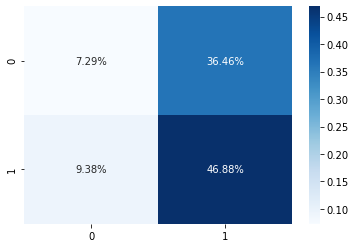

Epoch 1/15
56/56 [==============================] - 7s 67ms/step - loss: 0.7767 - AUC: 0.4892 - precision: 0.6119 - accuracy: 0.4554 - val_loss: 0.6902 - val_AUC: 0.5000 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 2/15
56/56 [==============================] - 2s 42ms/step - loss: 0.7205 - AUC: 0.5137 - precision: 0.5531 - accuracy: 0.4654 - val_loss: 0.6880 - val_AUC: 0.5039 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 3/15
56/56 [==============================] - 3s 45ms/step - loss: 0.6995 - AUC: 0.5370 - precision: 0.5636 - accuracy: 0.4933 - val_loss: 0.6862 - val_AUC: 0.5026 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 4/15
56/56 [==============================] - 2s 41ms/step - loss: 0.6908 - AUC: 0.5537 - precision: 0.5936 - accuracy: 0.5435 - val_loss: 0.6850 - val_AUC: 0.4935 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 5/15
56/56 [==============================] - 2s 44ms/step - loss: 0.6848 - AUC: 0.5413 - precision: 0.5880 - accuracy: 0.5569

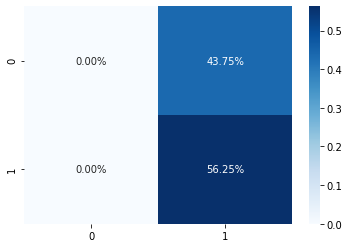

Epoch 1/15
56/56 [==============================] - 8s 69ms/step - loss: 0.7046 - AUC: 0.5225 - precision: 0.5791 - accuracy: 0.5335 - val_loss: 0.6915 - val_AUC: 0.4994 - val_precision: 0.5656 - val_accuracy: 0.5580
Epoch 2/15
56/56 [==============================] - 3s 48ms/step - loss: 0.6960 - AUC: 0.5245 - precision: 0.5762 - accuracy: 0.5413 - val_loss: 0.6878 - val_AUC: 0.5405 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 3/15
56/56 [==============================] - 3s 48ms/step - loss: 0.6757 - AUC: 0.5737 - precision: 0.5918 - accuracy: 0.5737 - val_loss: 0.6828 - val_AUC: 0.5704 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 4/15
56/56 [==============================] - 3s 46ms/step - loss: 0.6671 - AUC: 0.6118 - precision: 0.6079 - accuracy: 0.6038 - val_loss: 0.6792 - val_AUC: 0.5935 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 5/15
56/56 [==============================] - 3s 45ms/step - loss: 0.6648 - AUC: 0.6152 - precision: 0.6014 - accuracy: 0.5949

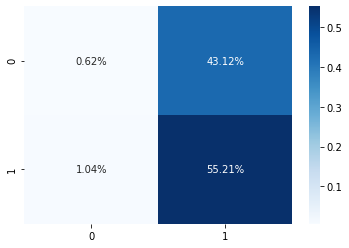

dummy  LR Bag of words  ...  GRU No WE  LSTM No WE
train time  0.000809         2.935791  ...  17.096180   18.628906
Accuracy    0.531250         0.641667  ...   0.571429    0.571429
Precision   0.531250         0.641667  ...   0.571429    0.571429
AUC         0.524074         0.621693  ...   0.503906    0.606812

[4 rows x 6 columns]

In [52]:
embedding = tf.keras.layers.Embedding(len(word_index)+1, MAX_LEN, input_length=MAX_LEN, trainable=False)
models = get_models(embedding, "No WE")
comparison = evaluate_model(models, comparison, X_train, y_train, X_test, y_test)
comparison


### Glove

In [53]:
# Fetch and unzip pretrained model


# # file = "https://nlp.stanford.edu/data/glove.6B.zip"
# # import urllib.request

# # response = urllib.request.urlopen(file)
# # with open('glove.zip', 'b+w') as f:
# #     f.write(response.read())
# from zipfile import ZipFile
# with ZipFile('glove.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()


In [54]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42, stratify=train.sentiment)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_tweet)

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_tweet), maxlen=MAX_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_tweet), maxlen=MAX_LEN)

y_train = np.asarray(df_train.sentiment).reshape(-1,1)
y_test = np.asarray(df_test.sentiment).reshape(-1,1)
  
emb_matrix, embed_vector_len, vocab_len = get_embedding_vector(tokenizer)
embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=MAX_LEN, weights = [emb_matrix], trainable=False)


(3442, 100)


#### Comparison

Epoch 1/15
56/56 [==============================] - 3s 26ms/step - loss: 0.8932 - AUC: 0.4865 - precision: 0.5641 - accuracy: 0.5536 - val_loss: 0.7228 - val_AUC: 0.4812 - val_precision: 0.5677 - val_accuracy: 0.5446
Epoch 2/15
56/56 [==============================] - 1s 17ms/step - loss: 0.7668 - AUC: 0.5363 - precision: 0.5741 - accuracy: 0.5603 - val_loss: 0.6996 - val_AUC: 0.5113 - val_precision: 0.5793 - val_accuracy: 0.5312
Epoch 3/15
56/56 [==============================] - 1s 17ms/step - loss: 0.7183 - AUC: 0.5623 - precision: 0.5809 - accuracy: 0.5580 - val_loss: 0.6946 - val_AUC: 0.5364 - val_precision: 0.5887 - val_accuracy: 0.5268
Epoch 4/15
56/56 [==============================] - 1s 18ms/step - loss: 0.6806 - AUC: 0.5966 - precision: 0.5967 - accuracy: 0.5703 - val_loss: 0.6930 - val_AUC: 0.5317 - val_precision: 0.6090 - val_accuracy: 0.5580
Epoch 5/15
56/56 [==============================] - 1s 20ms/step - loss: 0.7003 - AUC: 0.5682 - precision: 0.6017 - accuracy: 0.5725

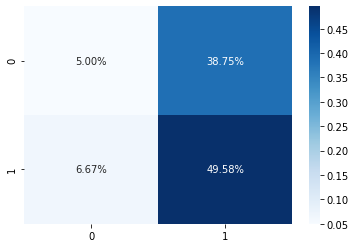

Epoch 1/15
56/56 [==============================] - 8s 65ms/step - loss: 0.7893 - AUC: 0.5329 - precision: 0.6008 - accuracy: 0.4933 - val_loss: 0.6966 - val_AUC: 0.4433 - val_precision: 0.5708 - val_accuracy: 0.5625
Epoch 2/15
56/56 [==============================] - 2s 41ms/step - loss: 0.7254 - AUC: 0.5430 - precision: 0.6010 - accuracy: 0.5257 - val_loss: 0.7024 - val_AUC: 0.4383 - val_precision: 0.5682 - val_accuracy: 0.5625
Epoch 3/15
56/56 [==============================] - 2s 42ms/step - loss: 0.6888 - AUC: 0.5849 - precision: 0.6164 - accuracy: 0.5748 - val_loss: 0.6998 - val_AUC: 0.4548 - val_precision: 0.5616 - val_accuracy: 0.5491
Epoch 4/15
56/56 [==============================] - 3s 45ms/step - loss: 0.6760 - AUC: 0.5998 - precision: 0.6168 - accuracy: 0.5848 - val_loss: 0.6914 - val_AUC: 0.5107 - val_precision: 0.5735 - val_accuracy: 0.5670
Epoch 5/15
56/56 [==============================] - 2s 44ms/step - loss: 0.6413 - AUC: 0.6726 - precision: 0.6543 - accuracy: 0.6429

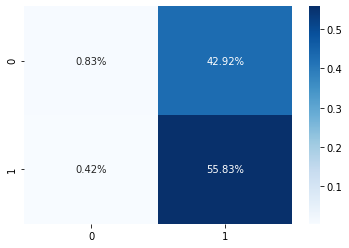

Epoch 1/15
56/56 [==============================] - 8s 70ms/step - loss: 0.7006 - AUC: 0.5940 - precision: 0.6293 - accuracy: 0.5904 - val_loss: 0.6901 - val_AUC: 0.5294 - val_precision: 0.5638 - val_accuracy: 0.5134
Epoch 2/15
56/56 [==============================] - 3s 47ms/step - loss: 0.6545 - AUC: 0.6454 - precision: 0.6357 - accuracy: 0.6150 - val_loss: 0.6788 - val_AUC: 0.6105 - val_precision: 0.5693 - val_accuracy: 0.5536
Epoch 3/15
56/56 [==============================] - 3s 47ms/step - loss: 0.6388 - AUC: 0.6814 - precision: 0.6521 - accuracy: 0.6328 - val_loss: 0.6641 - val_AUC: 0.6845 - val_precision: 0.6264 - val_accuracy: 0.6339
Epoch 4/15
56/56 [==============================] - 3s 48ms/step - loss: 0.6114 - AUC: 0.7116 - precision: 0.6644 - accuracy: 0.6529 - val_loss: 0.6513 - val_AUC: 0.6992 - val_precision: 0.6133 - val_accuracy: 0.6116
Epoch 5/15
56/56 [==============================] - 2s 44ms/step - loss: 0.6027 - AUC: 0.7234 - precision: 0.6695 - accuracy: 0.6585

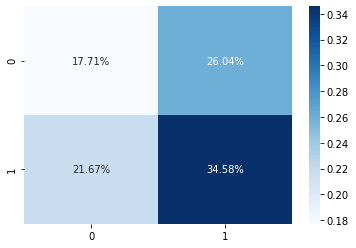

dummy  LR Bag of words  ...  GRU Glove  LSTM Glove
train time  0.000809         2.935791  ...  22.636637   18.086185
Accuracy    0.531250         0.641667  ...   0.678571    0.633929
Precision   0.531250         0.641667  ...   0.691781    0.666667
AUC         0.524074         0.621693  ...   0.692749    0.719564

[4 rows x 9 columns]

In [55]:
models = get_models(embedding_layer, "Glove")
comparison = evaluate_model(models, comparison, X_train, y_train, X_test, y_test)

comparison

## Word2vec

In [56]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42, stratify=train.sentiment)

size = 100
min_count = 2
workers = 3
seed = 42
sg = 0

data = train.clean_tweet.values
w2v_model = Word2Vec(min_count=min_count,
                     size=size,
                     sg=sg,
                     workers=4)

w2v_model.build_vocab(data)

In [57]:
def vectorize_data(data, vocab):
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda x: list(map(keys.index, filter(filter_unknown, x)))
    vectorized = list(map(encode, data))
    return vectorized

pad = pad_sequences(
    sequences=vectorize_data(data, vocab=w2v_model.wv.vocab),
    maxlen=MAX_LEN,
    padding='post')
print('Transforming... (done)')

Transforming... (done)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(pad,
                                                    train.sentiment,
                                                    test_size=0.2,
                                                    stratify=train.sentiment,
                                                    random_state=42)

#### Comparison

Epoch 1/15
64/64 [==============================] - 3s 25ms/step - loss: 0.7245 - AUC: 0.5094 - precision: 0.5623 - accuracy: 0.5410 - val_loss: 0.6840 - val_AUC: 0.5206 - val_precision: 0.5924 - val_accuracy: 0.5469
Epoch 2/15
64/64 [==============================] - 1s 17ms/step - loss: 0.7023 - AUC: 0.5238 - precision: 0.5683 - accuracy: 0.5391 - val_loss: 0.6843 - val_AUC: 0.5333 - val_precision: 0.6131 - val_accuracy: 0.5625
Epoch 3/15
64/64 [==============================] - 1s 19ms/step - loss: 0.6981 - AUC: 0.5233 - precision: 0.5627 - accuracy: 0.5322 - val_loss: 0.6886 - val_AUC: 0.5105 - val_precision: 0.5909 - val_accuracy: 0.5234
Epoch 4/15
64/64 [==============================] - 1s 22ms/step - loss: 0.7028 - AUC: 0.4931 - precision: 0.5522 - accuracy: 0.5176 - val_loss: 0.6856 - val_AUC: 0.5158 - val_precision: 0.5819 - val_accuracy: 0.5273
Epoch 5/15
64/64 [==============================] - 1s 18ms/step - loss: 0.6949 - AUC: 0.5153 - precision: 0.5540 - accuracy: 0.5195

Epoch 1/15
64/64 [==============================] - 7s 59ms/step - loss: 0.8283 - AUC: 0.5118 - precision: 0.5380 - accuracy: 0.4678 - val_loss: 0.6762 - val_AUC: 0.5646 - val_precision: 0.5817 - val_accuracy: 0.5742
Epoch 2/15
64/64 [==============================] - 3s 42ms/step - loss: 0.7669 - AUC: 0.5067 - precision: 0.5614 - accuracy: 0.5039 - val_loss: 0.6741 - val_AUC: 0.5505 - val_precision: 0.5857 - val_accuracy: 0.5820
Epoch 3/15
64/64 [==============================] - 3s 46ms/step - loss: 0.7367 - AUC: 0.5234 - precision: 0.5837 - accuracy: 0.5430 - val_loss: 0.6781 - val_AUC: 0.5444 - val_precision: 0.6008 - val_accuracy: 0.6055
Epoch 4/15
64/64 [==============================] - 3s 45ms/step - loss: 0.6991 - AUC: 0.5729 - precision: 0.5892 - accuracy: 0.5654 - val_loss: 0.6668 - val_AUC: 0.5954 - val_precision: 0.5935 - val_accuracy: 0.5938
Epoch 5/15
64/64 [==============================] - 3s 43ms/step - loss: 0.7062 - AUC: 0.5349 - precision: 0.5652 - accuracy: 0.5293

Epoch 1/15
64/64 [==============================] - 9s 64ms/step - loss: 0.8612 - AUC: 0.5325 - precision: 0.5807 - accuracy: 0.4932 - val_loss: 0.6975 - val_AUC: 0.5178 - val_precision: 0.6400 - val_accuracy: 0.4414
Epoch 2/15
64/64 [==============================] - 3s 49ms/step - loss: 0.7385 - AUC: 0.5763 - precision: 0.6161 - accuracy: 0.5381 - val_loss: 0.6888 - val_AUC: 0.5123 - val_precision: 0.5759 - val_accuracy: 0.5078
Epoch 3/15
64/64 [==============================] - 3s 47ms/step - loss: 0.7225 - AUC: 0.5836 - precision: 0.6150 - accuracy: 0.5410 - val_loss: 0.6705 - val_AUC: 0.6077 - val_precision: 0.5817 - val_accuracy: 0.5742
Epoch 4/15
64/64 [==============================] - 3s 47ms/step - loss: 0.7200 - AUC: 0.5629 - precision: 0.6016 - accuracy: 0.5430 - val_loss: 0.6572 - val_AUC: 0.6330 - val_precision: 0.5810 - val_accuracy: 0.5742
Epoch 5/15
64/64 [==============================] - 3s 47ms/step - loss: 0.6994 - AUC: 0.5784 - precision: 0.5986 - accuracy: 0.5547

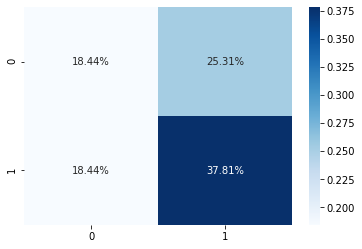

dummy  LR Bag of words  ...  GRU Word2Vec  LSTM Word2Vec
train time  0.000809         2.935791  ...     18.809243      24.094853
Accuracy    0.531250         0.641667  ...      0.609375       0.589844
Precision   0.531250         0.641667  ...      0.608696       0.640000
AUC         0.524074         0.621693  ...      0.604025       0.633019

[4 rows x 12 columns]

In [59]:
embedding_layer = Embedding(input_dim=emb_matrix.shape[0], output_dim=emb_matrix.shape[1], input_length=MAX_LEN, weights = [emb_matrix], trainable=False)
models = get_models(embedding_layer, "Word2Vec")
comparison = evaluate_model(models, comparison, X_train, y_train, X_test, y_test)

comparison

# Hypertuning

In [23]:
def create_model(optimizer='adam', learn_rate = 0.01):
  model = tf.keras.Sequential([
    embedding_layer,
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
  ])
  
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

df_train, df_test = train_test_split(train, test_size=0.3, random_state=42, stratify=train.sentiment)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_tweet)

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_tweet), maxlen=MAX_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_tweet), maxlen=MAX_LEN)

y_train = np.asarray(df_train.sentiment).reshape(-1,1)
y_test = np.asarray(df_test.sentiment).reshape(-1,1)
  
emb_matrix, embed_vector_len, vocab_len = get_embedding_vector(tokenizer)
embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=MAX_LEN, weights = [emb_matrix], trainable=False)


np.seed = 42
learn_rate = [0.01, 0.02, 0.03]
epochs=[10,15]
batch_size=[16, 32]
optimizer = ['SGD', 'Adam', 'Nadam']

model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=4)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

(3442, 100)


Best: 0.6928717891375223 using {'batch_size': 32, 'epochs': 15, 'learn_rate': 0.03, 'optimizer': 'Nadam'}

In [21]:
display(grid_result.best_params_, grid_result.best_score_)

{'batch_size': 32, 'epochs': 15, 'learn_rate': 0.03, 'optimizer': 'Nadam'}

0.6928717891375223

## Re training

Epoch 1/15
28/28 [==============================] - 5s 48ms/step - loss: 0.7172 - AUC: 0.5186 - precision: 0.5547 - accuracy: 0.5212 - val_loss: 0.6894 - val_AUC: 0.5000 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 2/15
28/28 [==============================] - 0s 16ms/step - loss: 0.6685 - AUC: 0.5973 - precision: 0.5894 - accuracy: 0.5926 - val_loss: 0.6843 - val_AUC: 0.5156 - val_precision: 0.5714 - val_accuracy: 0.5714
Epoch 3/15
28/28 [==============================] - 0s 15ms/step - loss: 0.6381 - AUC: 0.6743 - precision: 0.6245 - accuracy: 0.6339 - val_loss: 0.6650 - val_AUC: 0.6305 - val_precision: 0.6053 - val_accuracy: 0.6071
Epoch 4/15
28/28 [==============================] - 0s 17ms/step - loss: 0.6025 - AUC: 0.7182 - precision: 0.6514 - accuracy: 0.6529 - val_loss: 0.6476 - val_AUC: 0.6544 - val_precision: 0.6322 - val_accuracy: 0.6339
Epoch 5/15
28/28 [==============================] - 0s 16ms/step - loss: 0.5499 - AUC: 0.7777 - precision: 0.6851 - accuracy: 0.6853

<b>Hypertuned model:</b>

Accuracy -> 0.6696428656578064
Precision -> 0.75
AUC -> 0.7357178330421448
Confusion matrix for hypertuned model


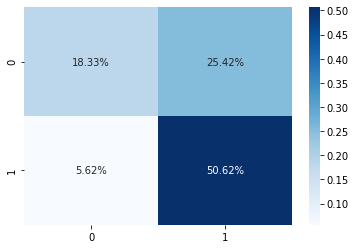

In [25]:
model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(32)),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
start = time.time()
    
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.03), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.Precision(name='precision'), 'accuracy'])
# fit network
batch_size = 32
epochs = 15
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)
end = time.time()
training_time = end - start
printmd("Hypertuned model:")
print('Accuracy ->', np.max(history.history['val_accuracy'])),
print('Precision ->', np.max(history.history['val_precision'])),
print('AUC ->', np.max(history.history['val_AUC'])),
y_pred = model.predict(X_test)
y_pred = [int(item>0.5) for  item in y_pred]
# print(y_pred, y_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for hypertuned model")
# print(cf_matrix)
plt.figure()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
    fmt='.2%', cmap='Blues')
plt.show()
# ev = model.evaluate(X_test, y_test

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


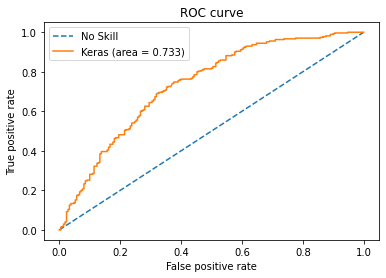

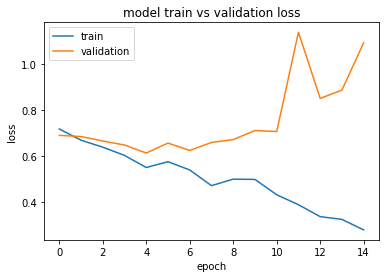

In [26]:
lr_probs = model.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr_keras, tpr_keras, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(lr_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('model train vs validation AUC')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# Training with more data

In [28]:
bigtrain = back.sample(500000, random_state=42)
bigtrain['clean_tweet'] = bigtrain['tweet'].apply(lambda x: custom_clean(x))
bigtrain['clean_tweet'] =  hero.clean(bigtrain['clean_tweet'], custom_pipeline)
bigtrain['clean_tweet'].head()



541200    lost her phone such a horrible day lake tomorr...
750                      did i have to fall so fucking hard
766711    just woke up from an sms and my heart melted w...
285055    oooh i like aston martins lmao that is a sore ...
705995      yeah around hour or i had started to feel crazy
Name: clean_tweet, dtype: object

In [29]:
bigtrain['sentiment'].replace(4, 1, inplace=True)
bigtrain['sentiment'].value_counts()
bigtrain.head()

sentiment  ...                                        clean_tweet
541200          0  ...  lost her phone such a horrible day lake tomorr...
750             0  ...                 did i have to fall so fucking hard
766711          1  ...  just woke up from an sms and my heart melted w...
285055          0  ...  oooh i like aston martins lmao that is a sore ...
705995          1  ...    yeah around hour or i had started to feel crazy

[5 rows x 3 columns]

In [ ]:
df_train, df_test = train_test_split(bigtrain, test_size=0.3, random_state=42, stratify=bigtrain.sentiment)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_tweet)

X_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_tweet), maxlen=MAX_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_tweet), maxlen=MAX_LEN)

y_train = np.asarray(df_train.sentiment).reshape(-1,1)
y_test = np.asarray(df_test.sentiment).reshape(-1,1)
  
emb_matrix, embed_vector_len, vocab_len = get_embedding_vector(tokenizer)
embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=MAX_LEN, weights = [emb_matrix], trainable=False)


model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(32)),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ]) #AUC 87.4

# model = Sequential([
#         embedding_layer,
#         Bidirectional(LSTM(32, return_sequences=True)),
#         BatchNormalization(),
#         Dropout(0.5),
#         Bidirectional(LSTM(32)),
#         BatchNormalization(),
#         Dropout(0.5),
#         Flatten(),
#         Dense(6, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ]) #AUC 87.4
from tensorflow.keras.callbacks import *
# model = Sequential([ #AUC 88.6
#       embedding_layer,
#       Dropout(0.5),
#       Bidirectional(LSTM(256, return_sequences = True)),
#       Dense(128, activation='relu'),
#       BatchNormalization(),
#       Dropout(0.5),
#       Bidirectional(LSTM(128)),
#       Dense(128, activation='relu'),
#       BatchNormalization(),
#       Dense(1, activation='sigmoid')
# ])
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]
start = time.time()
    
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.03), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.Precision(name='precision'), 'accuracy'])

batch_size = 1024 #128
epochs = 10
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)
end = time.time()
training_time = end - start
printmd("Hypertuned model with 500k tweets:")
print('Accuracy ->', np.max(history.history['val_accuracy'])),
print('Precision ->', np.max(history.history['val_precision'])),
print('AUC ->', np.max(history.history['val_AUC'])),
y_pred = model.predict(X_test)
y_pred = [int(item>0.5) for  item in y_pred]
# print(y_pred, y_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for hypertuned model")
# print(cf_matrix)
plt.figure()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
    fmt='.2%', cmap='Blues')
plt.show()
# ev = model.evaluate(X_test, y_test

In [91]:
model.save('/content/drive/MyDrive/OCR7/modele_final', save_traces=False)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/OCR7/modele_final/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/OCR7/modele_final/assets


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.894


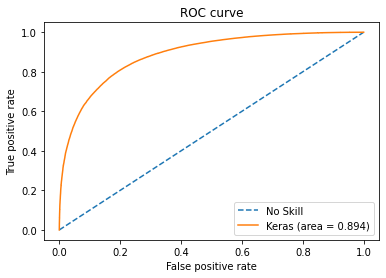

In [93]:
lr_probs = model.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(lr_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


# # plt.figure()
# # plt.plot(history.history['AUC'])
# # plt.plot(history.history['val_AUC'])
# # plt.title('model train vs validation AUC')
# # plt.ylabel('loss')
# # plt.xlabel('epoch')
# # plt.legend(['train', 'validation'], loc='best')
# # plt.show()

# plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# Test model

In [117]:
top = load_model("/content/drive/MyDrive/OCR7/modele_final/")
tok = joblib.load("/content/drive/MyDrive/OCR7/modele_final/tokenizer.pkl")

In [102]:
import json

data = ["This moment has made me really sad", "A rainbow of colors and views await you just west of Las Vegas"]
df = pd.DataFrame(data, columns=['tweets'])
df['clean_tweets'] = df.tweets.apply(lambda x: re.sub(r'\s', ' ', x))


# print(data)
x_test = pad_sequences(tok.texts_to_sequences(df.clean_tweets))
# # print(x_test)
scores = []
preds = top.predict(x_test)
for score in preds:
  scores.append(str(score.mean())) 
  print(score.mean())
# # t = json.dumps(scores)


0.0045104027
0.70030695


# Deploy to Azure cloud

In [28]:
# Fetch Workspace
ws = Workspace.from_config('/content/drive/MyDrive/OCR7/output/config.json')

In [110]:
# Register token and model
tokenizer_model = Model.register(workspace = ws,
                       model_path= '/content/drive/MyDrive/OCR7/modele_final/tokenizer.pkl',
                       model_name = 'tokenizer',
                       description = 'Sentiment analysis with Glove embeddings and Keras')

final_model = Model.register(workspace = ws,
                       model_path= '/content/drive/MyDrive/OCR7/modele_final',
                       model_name = 'air_paradis_model',
                       description = 'Sentiment analysis with Glove embeddings and Keras')

Registering model tokenizer
Registering model air_paradis_model


In [111]:
# Configuring environment and dependdencies
import sklearn
environment = Environment('my-env')
environment.python.conda_dependencies = CondaDependencies.create(pip_packages=[
    'azureml-defaults',
    'numpy',
    'joblib',
    'scikit-learn=={}'.format(sklearn.__version__),
    'tensorflow=={}'.format(tf.__version__),
    'keras',
    'pandas'
    
])

inference_config = InferenceConfig(entry_script='/content/drive/MyDrive/OCR7/output/score.py', environment=environment)
aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=2)

In [114]:
# Deploying service

service = Model.deploy(workspace=ws,
                       name='air-paradis-service',
                       models=[tokenizer_model, final_model],
                       inference_config=inference_config,
                       deployment_config=aci_config,
                       overwrite=True)
service.wait_for_deployment(show_output=True)


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-08-08 21:11:46+00:00 Creating Container Registry if not exists.
2021-08-08 21:11:46+00:00 Registering the environment.
2021-08-08 21:11:49+00:00 Use the existing image.
2021-08-08 21:11:50+00:00 Generating deployment configuration.
2021-08-08 21:11:51+00:00 Submitting deployment to compute..
2021-08-08 21:11:53+00:00 Checking the status of deployment air-paradis-service..
2021-08-08 21:13:55+00:00 Checking the status of inference endpoint air-paradis-service.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [106]:
final_model = Model.get_model_path('air_paradis_model')

In [45]:
print(service.get_logs())

2021-08-08T19:41:49,202730900+00:00 - gunicorn/run 
Dynamic Python package installation is disabled.
Starting HTTP server
2021-08-08T19:41:49,207903600+00:00 - iot-server/run 
2021-08-08T19:41:49,222751500+00:00 - rsyslog/run 
2021-08-08T19:41:49,257746200+00:00 - nginx/run 
EdgeHubConnectionString and IOTEDGE_IOTHUBHOSTNAME are not set. Exiting...
2021-08-08T19:41:49,513860900+00:00 - iot-server/finish 1 0
2021-08-08T19:41:49,519400900+00:00 - Exit code 1 is normal. Not restarting iot-server.
Starting gunicorn 20.1.0
Listening at: http://127.0.0.1:31311 (542)
Using worker: sync
worker timeout is set to 300
Booting worker with pid: 569
2021-08-08 19:41:51.873408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /azureml-envs/azureml_67e08ba0166b99e0135946dcbe336af3/lib:/azureml-envs/azureml_67e08ba0166b99e0135946dcbe3